In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fresco.potentials import UwU
from fresco.optimize import LBFGS_CPP

In [2]:
Nside = 100       # Half side length of grid (will be 2*Nside+1)
ndim = 2          # Dimensions
L = np.ones(ndim) # 1x1 square box
gridsize = np.ones(ndim,dtype=np.int32)*int(2*Nside+1) # grid shape
x0 = np.random.random(gridsize) # Random initial condition

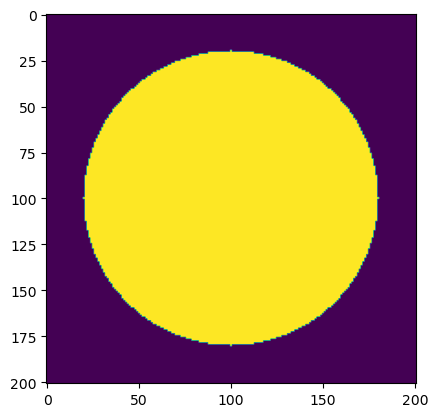

In [3]:
K = 80           # Limit of k-space we are constraining

# Create array of k-vector magnitudes
Kvec = np.arange(-Nside,Nside+1).reshape((1,-1))
Kmag = np.sqrt(Kvec**2 + (Kvec**2).T)

# Create the mask of k-vectors to be constrained
Kmask = np.array(Kmag <= K,dtype=np.int32)

fig = plt.figure()
ax = fig.gca()
ax.imshow(Kmask)
plt.show()

In [4]:
# Create the array of structure factor values corresponding to the k-vectors to be constrained
Sk = np.zeros(Kmag.shape)

# Create the weighting function
wk = Kmask

# Don't constrain the trivial peak at S(k=0)
center = int(Kmask.shape[0]/2)
wk[center,center] = 0

In [5]:
loss = UwU(gridsize, K, Sk, wk, L) # Initialize loss function
minimizer = LBFGS_CPP(x0.ravel(), loss, iprint=100) # Initialize minimizer

In [6]:
# Run the minimization
minimizer.run(1000)
res = minimizer.get_result()
x = np.array(res.coords)

lbgs: 0 E 1190292.4027983404 rms 358.56145668000789 nfev 2 step norm 0.10000000000000001
lbgs: 100 E 56892.358111261783 rms 17.93662816862221 nfev 423 step norm 5.0324038048990252e-07
lbgs: 200 E 189931.84561233543 rms 62.532501710526645 nfev 832 step norm 0.0062500000000000003
lbgs: 300 E 538886.80160814326 rms 188.39632324954178 nfev 1273 step norm 0.00056190476587524572
lbgs: 400 E 395207.70402270317 rms 150.1716598732186 nfev 1618 step norm 0.10000000000000001
lbgs: 500 E 307968.04778479342 rms 123.23586266274125 nfev 2077 step norm 4.3501707968030158e-06
lbgs: 600 E 249977.37445551838 rms 106.89286805819272 nfev 2478 step norm 1.0536688889501188e-08
lbgs: 700 E 164429.93633524945 rms 76.420056046929517 nfev 2886 step norm 0.025000000000000001
lbgs: 800 E 96565.826074121898 rms 50.884592509494667 nfev 3220 step norm 0.0022919916639344167
lbgs: 900 E 25076.252164825441 rms 18.25178839713378 nfev 3486 step norm 0.00019531250000000001


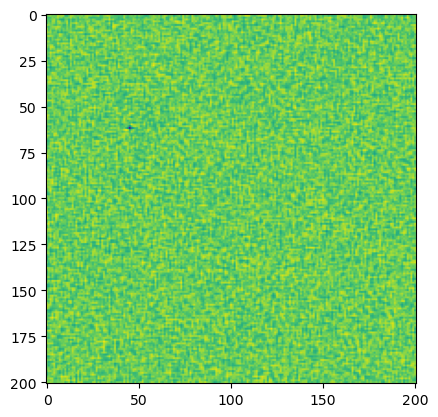

In [7]:
output = x.reshape(gridsize)

fig = plt.figure()
ax = fig.gca()
ax.imshow(output)
ax.set_aspect('equal')
plt.show()

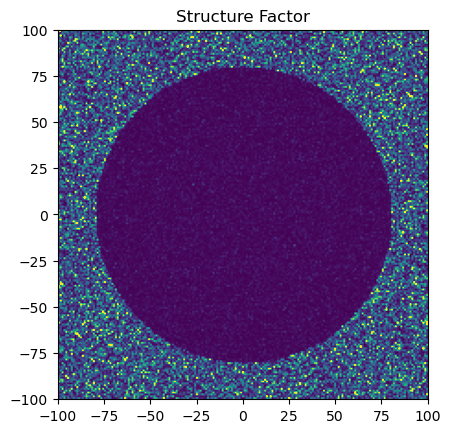

In [8]:
rhohat = np.fft.fft2(output)

Sk = np.absolute(rhohat)**2
Sk /= np.sum(np.absolute(output)**2)


fig = plt.figure()
ax = fig.gca()
ax.imshow(Sk,vmin=0,vmax=1,extent=[-Nside, Nside, -Nside, Nside])
ax.set_title("Structure Factor")
plt.show()